In [ ]:
!pip install pytesseract

In [22]:
from ultralytics import YOLO
import yaml
import torch
from PIL import Image
from IPython.display import display
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import cv2
import random
import pandas as pd
import pytesseract


image 1/1 /content/imgfolder/images.jpeg: 640x640 1 license_plate, 22.8ms
Speed: 4.2ms preprocess, 22.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
OCR Result for images.jpeg box [76,149,150,167]:
KL 11BP

image 1/1 /content/imgfolder/2020-Honda-City-Front-1200x697.jpg: 384x640 1 license_plate, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
OCR Result for 2020-Honda-City-Front-1200x697.jpg box [474,450,748,517]:
‘UP16 TC 2810:


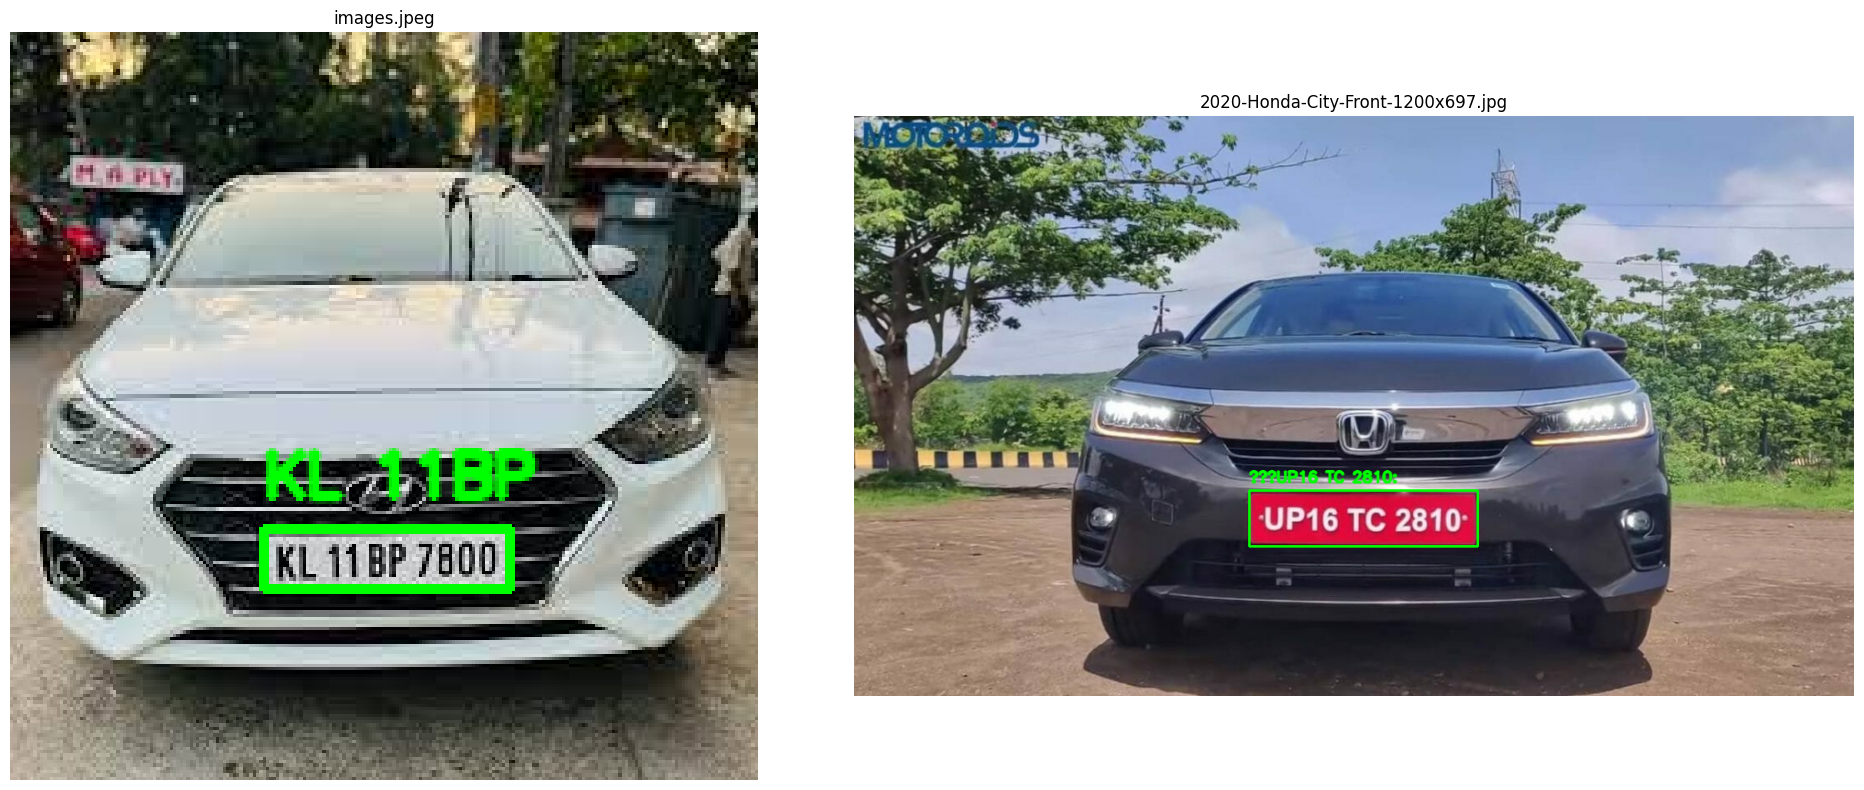

In [21]:
model_path = "/content/best.pt"
model = YOLO(model_path)
image_directory = "/content/imgfolder"
all_images = glob.glob(image_directory + "/*.[jJ][pP][eE][gG]") + \
             glob.glob(image_directory + "/*.[jJ][pP][gG]") + \
             glob.glob(image_directory + "/*.[pP][nN][gG]")

num_to_sample = min(2, len(all_images))
test_images = random.sample(all_images, num_to_sample)
fig, axes = plt.subplots(1, num_to_sample, figsize=(10 * num_to_sample, 8))
if num_to_sample == 1:
    axes = [axes]

for img_path, ax in zip(test_images, axes):
    image = cv2.imread(img_path)
    results = model(img_path)

    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coords
        cropped = image[y1:y2, x1:x2]           # Crop region
        gray_crop = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        text = pytesseract.image_to_string(gray_crop)
        print(f"OCR Result for {os.path.basename(img_path)} box [{x1},{y1},{x2},{y2}]:")
        print(text.strip())
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, text.strip(), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 0), 2, cv2.LINE_AA)


    annotated_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis("off")
    ax.set_title(os.path.basename(img_path))
plt.tight_layout()
plt.show()
